# EDA

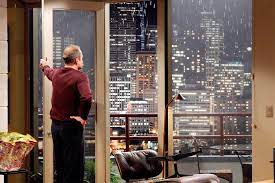

### Tasks
- Present at least 3 insights into the overall data
- Come up with at least 3 recommendations for the stakeholder

Therefore needed:
- well documented Jupyter Notebook
- updated README.md
- 10 min Google slides presentation

### Import all needed python modules
To work with the data and plot the data different modules are needed.
- Pandas for convenient dataframes.
- numpy get access to all the functions (like aggregate functions) for the dataframes and arrays
- matplotlib, seaborn, plotly for the plotting the data

In [1]:
# Import all needed modules.
import warnings

warnings.filterwarnings("ignore")

from datetime import datetime, date, time, timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)



### Understanding the data
The first step is to load the data and examine the general structure of the data. Learn what each column contains and how many columns and rows the data set contains. And also important, which column contains which data type.

In [2]:
# Load the data in a pandas dataframe.
df = pd.read_csv('data/King_County_House_prices_dataset.csv')

In [3]:
# Explore the general structure of the data.
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [4]:
# Show number of rows and columns.
print(f'The data set consists of {df.shape[0]} rows and {df.shape[1]} columns.')

The data set consists of 21597 rows and 21 columns.


In [5]:
# Get more info on the data types in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

There are values missing in:
- `yr_renovated`, a lot of missing values  -> these houses were never renovated?
- `waterfront`, a lot of missing values -> data is divided in 0, NaN and 1. 1 means view to a waterfront from the house and 0 and NaN no view?
- `view`, a few missing values -> these houses have not had any viewings yet. 

There are some columns with data types that have to be changed:
- `yr_renovated` to an integer
- `date` to a date 
- `sqft_basement` to an integer
- `price` to an integer



### First cleaning of the data
The first cleaning of the data is to get rid of NaNs, change the data type for some columns and rename some columns for a better understanding. 

In [6]:
# Change all NaNs to 0 and convert the column to integers.
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].astype('int64')

df['waterfront'] = df['waterfront'].fillna(0)
df['waterfront'] = df['waterfront'].astype('int64')

df['view'] = df['view'].fillna(0)
df['view'] = df['view'].astype('int64')

In [7]:
# Convert date to datetime format.
df['date'] = pd.to_datetime(df['date'])
# Convert the columns to integer.
df['price'] = df['price'].astype('int64')

In [8]:
# The square footage of the basement is in strings due to a ? in the column.
df['sqft_basement'] = df['sqft_basement'].str.replace('?', '0')
# The string was replaced by a 0 and is now converted to float.
df['sqft_basement'] = df['sqft_basement'].astype('float64')
# Finally the float is converted to integer.
df['sqft_basement'] = df['sqft_basement'].astype('int64')

In [9]:
# Rename some columns for better understanding of the data.
df.rename(columns={'view':'viewings'}, inplace=True)
df.rename(columns={'date':'sales_date'}, inplace=True)

In [10]:
# Call the current state of the data set.
df.head()

,id,sales_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,viewings,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


### First descriptive statistics of the data
Just a quick look at  simple descriptive statistics across the whole data set. 

In [11]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,viewings,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.007,0.233,3.410,7.658,1788.597,285.717,1971.000,68.758,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.082,0.765,0.651,1.173,827.760,439.820,29.375,364.037,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,550.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


### Stakeholder infos
These are the information on my chosen stakholder:

| Name                | Stakeholder | Characteristics |
| ------------------- | ----------- | ----------------|
| Amy Williams | Seller | Italian mafiosi, sells several central houses(top10%) over time, needs average outskirt houses over time to hide from the FBI |

#### Questions that arise
From this profile several questions arise:
- What is a central, what an outskirt house?
- What makes up the top 10% of homes?
- What makes an average outskirt house? 

#### Questions to answer
As one ponders the above questions, other questions and hypotheses come to mind:

 | Question | Hypotheses | Indicators|
 | -------- | ---------- | --------- |
 | Does the zip code define an outskirt or central house? |  outskirt and central houses can be distinguished depending on their zip code | geolocation, ZIP code |
 | Is the number of houses in the central area higher than in the outskirt area? |  there are more houses in the central area | geolocation |
 | Does the condition impact the price of a house? | houses in better condition are pricier| compare condition and price | 
 | Does the King County grading system affect the prices of a house? | higher grades mean pricer house | grade and price |
 | Does the living space have an impact on the price of a house? | houses with more living space are pricier | renovation in the last years five years and price |
 | Does the average prices differ between central and outskirt houses? | houses in central areas are pricier  | geolocation, ZIP code |
 | Is the average grade lower in outskirts? | both are lower in the outskirts | condition and grade |
 | Do outskirt houses have larger lot than city houses? | houses in the outskirts have more lot | sqft_lotsquare |
 

### Exploring the data
In order to get insights into the data we explore the value distribution in each column by plotting a histogram of each.

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'sales_date'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'viewings'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'cen

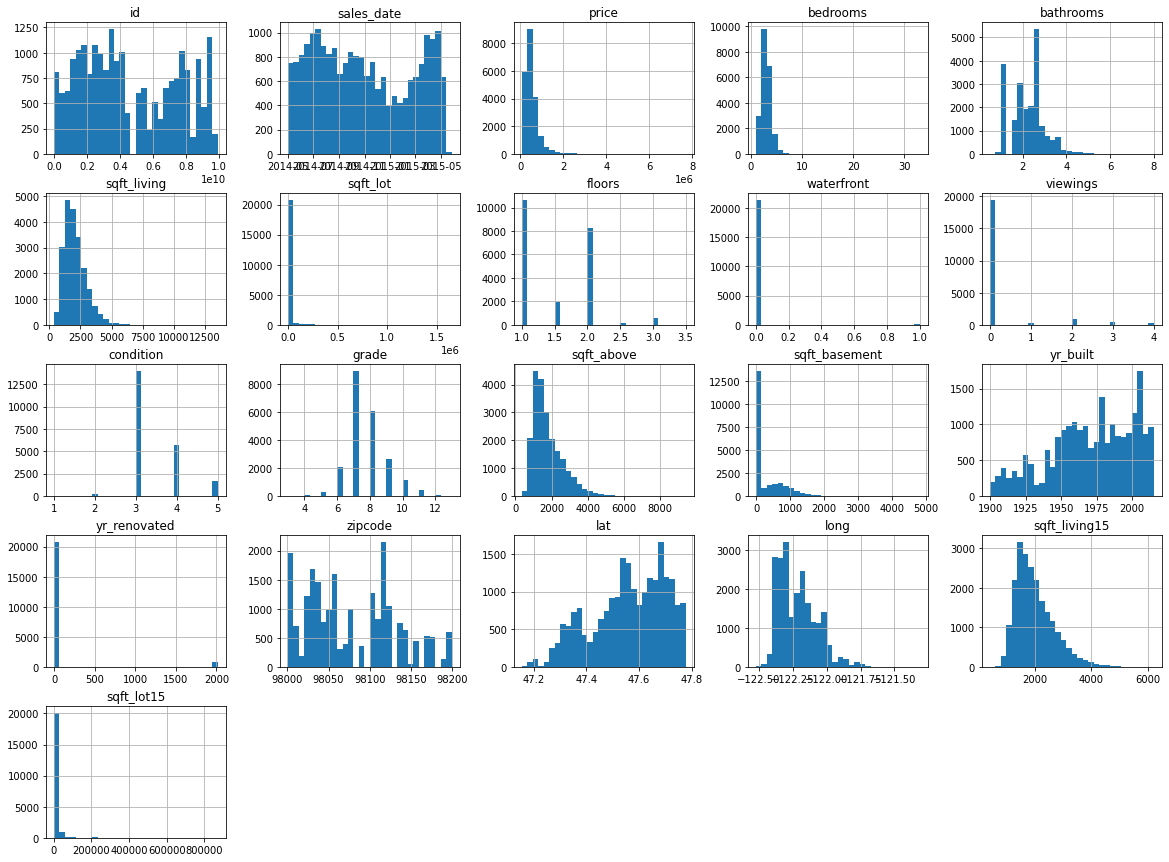

In [12]:
# Plot histograms for all columns to see the distributions.
df.hist(bins=30, figsize=(20,15))

These distributions show us, that there a lot of categorical data like: id, condition, grade, zipcode, viewings, waterfront, sales_date. For the rest of the data, we do not see a normal distribution at first glance.

It would be also interesting to see if there are any obvious correlations between the data. Therefore, a correlation heatmap is plotted.

<AxesSubplot:>

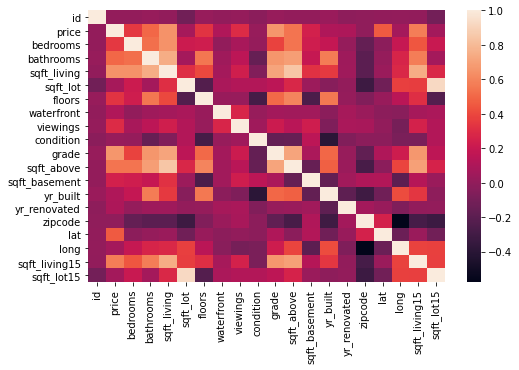

In [13]:
# Plot a correlation heatmap to see the which values correlate with each other.
sns.heatmap(df.corr(method='spearman'))

## What is a central, what an outskirt house?
### Does the ZIP code define an outskirt or central house?
To answer the above questions, we need to define what is central and what is remote. Therefore, we look at where the houses with different postal codes are located. For this purpose, the houses in plotly are colored according to their ZIP codes. Then we can see the ZIP codes of the houses in the outskirts.

In [14]:
# Create a map of the King County area, where the houses from data set are located.
fig = px.scatter_mapbox(df,
                        lat='lat', lon='long',
                        color=df['zipcode'].astype(str),
                        hover_name='zipcode', 
                        size_max=15, 
                        zoom=8, 
                        width=900, height=600,
                        title =  'King County map colored in the ZIP codes')
# Get the map background.
fig.update_layout(mapbox_style='carto-positron', legend_title_text='ZIP code')
fig.show(config={'scrollZoom': False})

# These are the different map backgrounds available:
# "open-street-map", "carto-positron", "carto-darkmatter", "stamen-terrain", "stamen-toner" or "stamen-watercolor"

### Defining the outskirt
From the map above we can conclude which areas are outskirt areas by their ZIP codes. We defined that the ZIP codes of the outskirt regions are:

98010, 98014, 98019, 98022, 98024, 98027, 98029, 98032, 98038, 98042, 98045, 98053, 98065, 98070, 98077, 98092

Therefore we create a new column in our dataframe containing if the house is in the central or outskirt.

In [15]:
# Create a new column to which shows if the house has a central location or not.
df.eval('central_location = (zipcode != [98010, 98014, 98019, 98022, 98024, 98027, 98029, 98038, 98042, 98045, 98053, 98065, 98070, 98074, 98075, 98077, 98092])', inplace=True)
# Convert this new column in 
df['location'] = np.where(df['central_location'] == True, 'central', 'outskirt')
df.head()

,id,sales_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,viewings,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,central_location,location
0,7129300520,2014-10-13,221900,3,1.000,1180,5650,1.000,0,0,...,0,1955,0,98178,47.511,-122.257,1340,5650,True,central
1,6414100192,2014-12-09,538000,3,2.250,2570,7242,2.000,0,0,...,400,1951,1991,98125,47.721,-122.319,1690,7639,True,central
2,5631500400,2015-02-25,180000,2,1.000,770,10000,1.000,0,0,...,0,1933,0,98028,47.738,-122.233,2720,8062,True,central
3,2487200875,2014-12-09,604000,4,3.000,1960,5000,1.000,0,0,...,910,1965,0,98136,47.521,-122.393,1360,5000,True,central
4,1954400510,2015-02-18,510000,3,2.000,1680,8080,1.000,0,0,...,0,1987,0,98074,47.617,-122.045,1800,7503,False,outskirt


With this new column we can map the outskirt and central houses separately. 

In [16]:
# Create a map of the King County area, where the houses from data set are located.
fig = px.scatter_mapbox(df,
                        lat='lat', lon='long',
                        color='location',
                        hover_name='location',
                        size_max=15, 
                        zoom=8, 
                        width=900, height=600,
                        title =  'King County map showing houses in the central and outskirt areas')
                        
# Get the Open Street Map Background
fig.update_layout(mapbox_style='carto-positron', legend_title_text='Location')
fig.show(config={'scrollZoom': False})

### Is the number of houses in the central area higher than in the outskirt area?
We create a new record grouped by location and count all the entries. Then we can plot the numbers in a bar chart. It shows that there are more houses in the center than in the outskirts. 

In [17]:
number_central_outskirt = df.groupby('location').size().to_frame('number').reset_index()

number_central_outskirt.head()

,location,number
0,central,16604
1,outskirt,4993


Text(0, 0.5, 'number of houses')

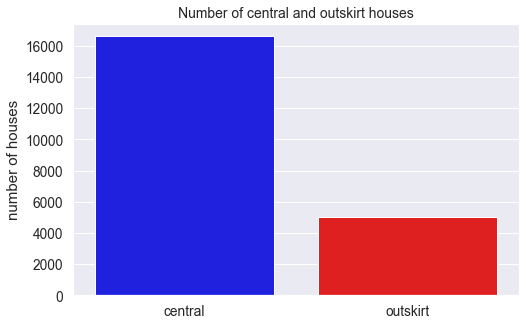

In [18]:
sns.set(font_scale = 1.25)
sns.barplot(data=number_central_outskirt, x='location', y='number', palette=['blue', 'red'])
plt.title('Number of central and outskirt houses', fontdict={'size':14})
plt.xlabel('')
plt.ylabel('number of houses')

## What makes up the top 10% of homes?
A quick correlation shows us some of the interesting values.

In [19]:
df.corr()['price'].sort_values(ascending=False)

price               1.000
sqft_living         0.702
grade               0.668
sqft_above          0.605
sqft_living15       0.585
bathrooms           0.526
viewings            0.393
sqft_basement       0.321
bedrooms            0.309
lat                 0.307
waterfront          0.264
floors              0.257
yr_renovated        0.118
sqft_lot            0.090
sqft_lot15          0.083
yr_built            0.054
central_location    0.039
condition           0.036
long                0.022
id                 -0.017
zipcode            -0.053
Name: price, dtype: float64

### Does the condition impact the price of a house?
Looking into the condition rating, we group the data by condition and calculate the median of the price. Here we use the median, because we could see above that the prices are not normally distributed. A line graph shows us that median prices actually increase the higher the condition rating of the house. For better readability the prices are given in thousand dollars.

In [20]:
price_condition = df.groupby('condition').median()['price'].reset_index()
price_condition.eval('price_in_thousand = price / 1000', inplace=True)
price_condition

,condition,price,price_in_thousand
0,1,270000.000,270.000
1,2,279000.000,279.000
2,3,450250.000,450.250
3,4,440000.000,440.000
4,5,526000.000,526.000


In [21]:
df[['price', 'condition']].corr(method='spearman')

,price,condition
price,1.000,0.018
condition,0.018,1.000


Text(0, 0.5, 'price [thousand $]')

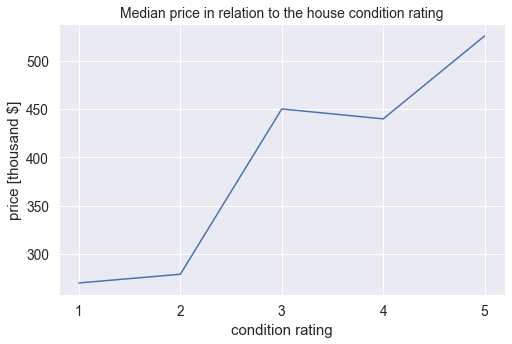

In [22]:
sns.set(font_scale = 1.25)
price_condition_fig = sns.lineplot(data= price_condition, x='condition', y='price_in_thousand')
price_condition_fig.set_xticks([1, 2, 3, 4, 5])
plt.title('Median price in relation to the house condition rating', fontdict={'size':14})
plt.xlabel('condition rating')
plt.ylabel('price [thousand $]')


### Does the King County grading system affect the prices of a house?
For the grading, we again group the data by condition and calculate the median of the price.
A line graph shows us that median prices actually increase the higher the grade of the house. For better readability the prices are given in thousand dollars.

In [23]:
price_grade = df.groupby('grade').median()['price'].reset_index()
price_grade.eval('price_in_thousand = price / 1000', inplace=True)
price_grade

,grade,price,price_in_thousand
0,3,262000.000,262.000
1,4,200000.000,200.000
2,5,228700.000,228.700
3,6,275276.500,275.276
4,7,375000.000,375.000
5,8,510000.000,510.000
6,9,720000.000,720.000
7,10,914327.000,914.327
8,11,1280000.000,1280.000
9,12,1820000.000,1820.000


In [24]:
df[['price', 'grade']].corr(method='spearman')

,price,grade
price,1.000,0.658
grade,0.658,1.000


Text(0, 0.5, 'price [thousand $]')

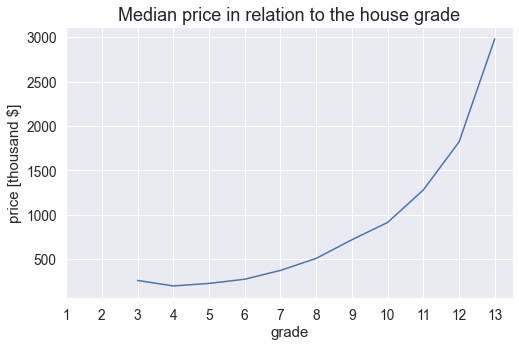

In [25]:
sns.set(font_scale = 1.25)
price_grade_fig = sns.lineplot(data= price_grade, x='grade', y='price_in_thousand')
price_grade_fig.set_xticks(range(1,14))
plt.title('Median price in relation to the house grade', fontdict={'size':18})
plt.xlabel('grade')
plt.ylabel('price [thousand $]')

### Does the living space have an impact on the price of a house?
For the living space (sqft_living) the data is plotted as a scatterplot. For better readability the prices are given in million dollars. The scatterplot shows us that prices actually increase the larger the living space is.

In [26]:
price_livingspace = df[['price', 'sqft_living', 'location']]
price_livingspace.eval('price_in_million = price / 1000000', inplace=True)
price_livingspace

,price,sqft_living,location,price_in_million
0,221900,1180,central,0.222
1,538000,2570,central,0.538
2,180000,770,central,0.180
3,604000,1960,central,0.604
4,510000,1680,outskirt,0.510
...,...,...,...,...
21592,360000,1530,central,0.360
21593,400000,2310,central,0.400
21594,402101,1020,central,0.402
21595,400000,1600,outskirt,0.400


In [27]:
df[['price', 'sqft_living', 'location']].groupby('location').corr('pearson')

price  sqft_living
location                                
central  price        1.000        0.717
         sqft_living  0.717        1.000
outskirt price        1.000        0.782
         sqft_living  0.782        1.000

Text(0, 0.5, 'price [million $]')

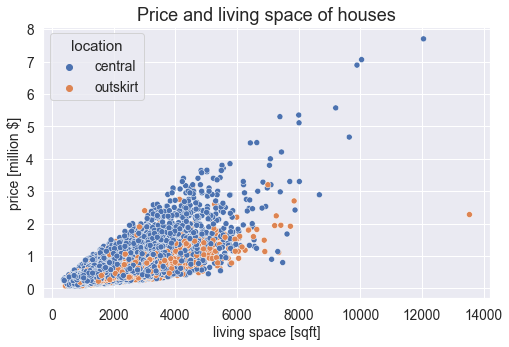

In [28]:
sns.set(font_scale = 1.25)
sns.scatterplot(data=price_livingspace, x='sqft_living', y='price_in_million', hue='location')
plt.title('Price and living space of houses', fontdict={'size':18})
plt.xlabel('living space [sqft]', fontdict={'size':14})
plt.ylabel('price [million $]', fontdict={'size':14})

### Getting the top 10% of central houses
According to these considerations, we can now create a dataframe that includes only the top 10% of homes based on price, grade, and living space (sqft_living). We create a data set with only the central houses. Afterwards, the upper 10% quantile are calculated for price, grade and living space.

In [29]:
df_central = df.query('central_location == True')

In [30]:
top10_price = df_central['price'].quantile(0.9)
top10_grade = df_central['grade'].quantile(0.9)
top10_living = df_central['sqft_living'].quantile(0.9)
print(f'The mark for the top 10% in price is {top10_price}$, for grade is {top10_grade} and for living space {top10_living} sqft.')

The mark for the top 10% in price is 920000.0$, for grade is 9.0 and for living space 3140.0 sqft.


With these marks, we now can create the final data set.

In [31]:
top10_living_df = df_central.query('sqft_living >= @top10_living & grade >= @top10_grade & price >= @top10_price')

In [32]:
# Create a map of the King County area, where the houses from data set are located.
fig = px.scatter_mapbox(top10_living_df,
                        lat='lat', lon='long',
                        color='price',
                        hover_name='price',
                        hover_data=['grade', 'sqft_living'], 
                        size_max=15, 
                        zoom=8, 
                        width=900, height=600,
                        title =  'King County map showing the top 10% of houses in the central areas')
                        
# Get the Open Street Map Background
fig.update_layout(mapbox_style='carto-positron', legend_title_text='Location')
fig.show(config={'scrollZoom': False})

## What makes an average outskirt house? 
### Does the average prices differ between central and outskirt houses?
For this question we create a dataframe that contains the median of all data grouped by central and outskirt location of the houses. The median prices between central and outskirt are plotted by a bar chart. The price is given in thousand dollars for better readability.

In [33]:
average_central_outskirt = df.groupby('location').median().reset_index()
average_central_outskirt.eval('price_in_thousand = price / 1000', inplace=True)
average_central_outskirt

,location,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,viewings,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,central_location,price_in_thousand
0,central,3894100250.500,450000.000,3.000,2.000,1830.000,7350.000,1.000,0.000,0.000,...,0.000,1965.000,0.000,98103.000,47.593,-122.289,1760.000,7455.000,1.000,450.000
1,outskirt,3905030140.000,460000.000,3.000,2.500,2220.000,9516.000,2.000,0.000,0.000,...,0.000,1993.000,0.000,98042.000,47.532,-122.030,2200.000,8910.000,0.000,460.000


Text(0, 0.5, 'price [thousand $]')

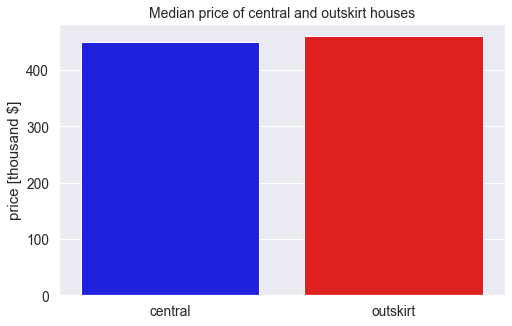

In [34]:
sns.set(font_scale = 1.25)
sns.barplot(data=average_central_outskirt, 
            x='location', 
            y='price_in_thousand',
            palette=['blue', 'red'])
plt.title('Median price of central and outskirt houses', fontdict={'size':14})
plt.xlabel('')
plt.ylabel('price [thousand $]')

### Is the average grade lower in outskirts? 
We use the dataframe from before and plot the grade difference between central and outskirt houses as a bar chart.

Text(0, 0.5, 'grade')

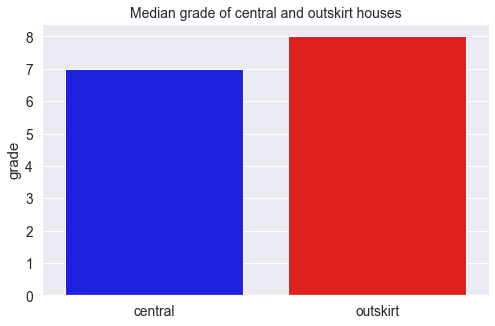

In [35]:
sns.set(font_scale = 1.25)
sns.barplot(data=average_central_outskirt, 
            x='location', 
            y='grade',
            palette=['blue', 'red'])
plt.title('Median grade of central and outskirt houses', fontdict={'size':14})
plt.xlabel('')
plt.ylabel('grade')

### Do outskirt houses have larger lot than city houses?
We use the dataframe from before and plot the lot difference between central and outskirt houses as a bar chart.

Text(0, 0.5, 'lot [sqft]')

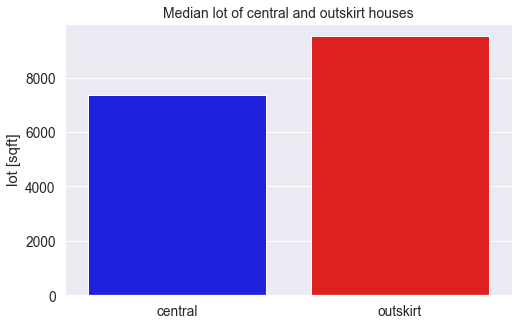

In [36]:
sns.set(font_scale = 1.25)
sns.barplot(data=average_central_outskirt, 
            x='location', 
            y='sqft_lot',
            palette=['blue', 'red'])
plt.title('Median lot of central and outskirt houses', fontdict={'size':14})
plt.xlabel('')
plt.ylabel('lot [sqft]')

### Mapping the average outskirt houses

In [37]:
df_outskirt = df.query('central_location == False')

In [38]:
price_q1 = df_outskirt['price'].quantile(0.25)
price_q3 = df_outskirt['price'].quantile(0.75)
price_IQR = price_q3 - price_q1
print(price_q1, price_q3, price_IQR)

325000.0 645000.0 320000.0


In [39]:
grade_q1 = df_outskirt['grade'].quantile(0.25)
grade_q3 = df_outskirt['grade'].quantile(0.75)
grade_IQR = grade_q3 - grade_q1
print(grade_q1, grade_q3, grade_IQR)

7.0 9.0 2.0


In [40]:
lot_q1 = df_outskirt['sqft_lot'].quantile(0.25)
lot_q3 = df_outskirt['sqft_lot'].quantile(0.75)
lot_IQR = lot_q3 - lot_q1
print(lot_q1, lot_q3, lot_IQR)

5906.0 25046.0 19140.0


In [41]:
df_outskirt_IQR = df_outskirt.query('@price_q1 <= price <= @price_q3 & @grade_q1 <= grade <= @grade_q1 & @lot_q1 <= sqft_lot <= @lot_q3')

In [42]:
# Create a map of the King County area, where the houses from data set are located.
fig = px.scatter_mapbox(df_outskirt_IQR,
                        lat='lat', lon='long',
                        color='price',
                        hover_name='price',
                        hover_data=['grade', 'sqft_lot'], 
                        size_max=15, 
                        zoom=8, 
                        width=900, height=600,
                        title =  'King County map showing average outskirt houses')
                        
# Get the Open Street Map Background
fig.update_layout(mapbox_style='carto-positron', legend_title_text='Location')
fig.show(config={'scrollZoom': False})